# **Đồ án Khai phá dữ liệu - Nhóm 7**
### **Sinh viên thực hiện:**
* Lê Vĩnh Hân - 2251068192
* Nguyễn Thái Bảo Duy - 2251068181
* Đỗ Nguyên Giáp - 2251068189
#### Dataset: https://www.kaggle.com/datasets/cemeraan/3a-superstore

# **Importing module & Exploring Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import polars as pl
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

In [2]:
DATA_CLEAN = Path(r"C:\Users\pitou\Desktop\Data Mining\data_clean")
final_data = DATA_CLEAN / "final_data.parquet"
df = pl.read_parquet(str(final_data)) # đọc dữ liệu với polars

In [3]:
print(f'Số dòng: {df.height}')
print(f'Số cột: {len(df.columns)}')

Số dòng: 51185032
Số cột: 22


In [4]:
df.head()

order_id,order_date,order_year,order_month,order_weekday,total_basket,branch_id,branch_region,branch_city,branch_town,item_id,item_name,category1,category2,category3,category4,brand,amount,unit_price,total_price,discount_amount,user_id
str,datetime[μs],i32,i8,i8,f64,str,str,str,str,str,str,str,str,str,str,str,i64,f64,f64,f64,str
"""5706706""",2023-01-05 00:00:00,2023,1,4,973.18,"""472-BA1""","""Güneydoğu Anadolu""","""Batman""","""BATMAN MERKEZ""","""7240""","""SENSODYNE D.MAC. 75 ML HIZ.RAH…","""KOZMETIK""","""AGIZ BAKIM URUNLERI""","""DIS MACUNLARI""","""MACUNLAR""","""SENSODYNE""",2,207.9,443.46,-27.66,"""41149"""
"""5690604""",2023-02-18 00:00:00,2023,2,6,5535.42,"""716-BU3""","""Marmara""","""Bursa""","""BÜYÜKORHAN""","""6034""","""SENSODYNE D.MAC 75 ML TO.CR.W…","""KOZMETIK""","""AGIZ BAKIM URUNLERI""","""DIS MACUNLARI""","""MACUNLAR""","""SENSODYNE""",2,167.7,341.2,-5.8,"""78883"""
"""5679103""",2022-09-08 00:00:00,2022,9,4,2132.49,"""335-İZ2""","""Ege""","""İzmir""","""BALÇOVA""","""17170""","""SENSODYNE D.MAC 75 ML WHITE*1…","""KOZMETIK""","""AGIZ BAKIM URUNLERI""","""DIS MACUNLARI""","""MACUNLAR""","""SENSODYNE""",6,134.75,873.9,-65.4,"""30904"""
"""5679166""",2021-06-20 00:00:00,2021,6,7,660.12,"""335-İZ2""","""Ege""","""İzmir""","""BALÇOVA""","""3573""","""SENSODYNE D.MAC.50 ML WHITENIN…","""KOZMETIK""","""AGIZ BAKIM URUNLERI""","""DIS MACUNLARI""","""MACUNLAR""","""SENSODYNE""",2,59.45,73.66,45.24,"""40001"""
"""5698407""",2021-03-08 00:00:00,2021,3,1,1532.53,"""335-İZ2""","""Ege""","""İzmir""","""BALÇOVA""","""24359""","""SENSODYNE DIS MAC.50 ML TO.CAR…","""KOZMETIK""","""AGIZ BAKIM URUNLERI""","""DIS MACUNLARI""","""MACUNLAR""","""SENSODYNE""",2,36.72,42.0,31.44,"""31806"""


In [5]:
df.schema # df.info()

Schema([('order_id', String),
        ('order_date', Datetime(time_unit='us', time_zone=None)),
        ('order_year', Int32),
        ('order_month', Int8),
        ('order_weekday', Int8),
        ('total_basket', Float64),
        ('branch_id', String),
        ('branch_region', String),
        ('branch_city', String),
        ('branch_town', String),
        ('item_id', String),
        ('item_name', String),
        ('category1', String),
        ('category2', String),
        ('category3', String),
        ('category4', String),
        ('brand', String),
        ('amount', Int64),
        ('unit_price', Float64),
        ('total_price', Float64),
        ('discount_amount', Float64),
        ('user_id', String)])

In [ ]:
df.describe()

# bộ dữ liệu cung cấp dữ liệu bán hàng trong 3 năm 2021 - 2023

statistic,order_id,order_date,order_year,order_month,order_weekday,total_basket,branch_id,branch_region,branch_city,branch_town,item_id,item_name,category1,category2,category3,category4,brand,amount,unit_price,total_price,discount_amount,user_id
str,str,str,f64,f64,f64,f64,str,str,str,str,str,str,str,str,str,str,str,f64,f64,f64,f64,str
"""count""","""51185032""","""51185032""",5.1185032e7,5.1185032e7,5.1185032e7,5.1185032e7,"""51185032""","""51185032""","""51185032""","""51185032""","""51185032""","""51185032""","""51185032""","""51185032""","""51185032""","""51185032""","""51185032""",5.1185032e7,5.1185032e7,5.1185032e7,5.1185032e7,"""51185032"""
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,"""0"""
"""mean""",null,"""2022-04-23 08:48:28.510097""",2021.854213,5.992054,4.002572,1621.580318,null,null,null,null,null,null,null,null,null,null,null,4.49982,64.820449,256.044922,35.595402,null
"""std""",null,null,0.772753,3.333038,2.001677,1660.617662,null,null,null,null,null,null,null,null,null,null,null,2.291345,115.667971,548.114821,227.648978,null
"""min""","""1""","""2021-01-01 00:00:00""",2021.0,1.0,1.0,0.0,"""11-AD1""","""Akdeniz""","""Adana""","""ABANA""","""1""","""""ACE ELDE YIKAMA BAHAR 700 GR …","""BEBEK""","""AGDA-TUY DOKUCULER""","""1.KALITE""","""1.KALITE""","""8X4""",1.0,0.0,0.0,-56788.88,"""1"""
"""25%""",null,"""2021-08-27 00:00:00""",2021.0,3.0,2.0,713.28,null,null,null,null,null,null,null,null,null,null,null,2.0,15.2,42.45,-5.38,null
"""50%""",null,"""2022-04-23 00:00:00""",2022.0,6.0,4.0,1285.13,null,null,null,null,null,null,null,null,null,null,null,4.0,35.5,116.06,4.22,null
"""75%""",null,"""2022-12-18 00:00:00""",2022.0,9.0,6.0,2108.49,null,null,null,null,null,null,null,null,null,null,null,6.0,78.0,288.12,39.69,null
"""max""","""9999999""","""2023-08-14 00:00:00""",2023.0,12.0,7.0,307683.45,"""777-YA1""","""İç Anadolu""","""Şırnak""","""İZNİK""","""9999""","""İNSAN NE İLE YAŞAR / TUNA""","""TEMIZLIK""","""ZEKA GELISTIRICI""","""ZEYTIN""","""ZUCCACIYE""","""ZERDALI""",8.0,6302.3,59520.96,50396.4,"""99999"""


In [10]:
df.select(pl.all().null_count()) # check null (df.isnull().sum() - pandas)

# dữ liệu sạch - không có giá trị khuyết

order_id,order_date,order_year,order_month,order_weekday,total_basket,branch_id,branch_region,branch_city,branch_town,item_id,item_name,category1,category2,category3,category4,brand,amount,unit_price,total_price,discount_amount,user_id,gross_revenue
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **1. Phân tích và dự đoán doanh thu**

phân tích và dự đoán doanh thu dựa trên doanh thu thuần - nên dùng total_basket ở cấp đơn hàng

total_basket là số tiền mà khách hàng phải trả cho mỗi hóa đơn khác với total_price là số tiền cho mỗi món hàng

vd total_price: 3 wireless-mouse - mỗi item 20$ => 60$ cho 3 items => chiết khấu 10% => total_price = 54$

vd total_basket: 3 wireless-mouse - mỗi item 20$, 5 books - mỗi item 5$ => tổng hóa đơn 85$ => chiết khấu 10$ => total_basket = 76.5$

gross_revenue là một công cụ chiến lược thay vì công cụ tài chính

## **1.1. Tính doanh thu thuần và doanh thu gộp**

In [4]:
# gross revenue - doanh thu trước khi trừ chiết khấu
df = df.with_columns(
    (pl.col('amount') * pl.col('unit_price')).alias('gross_revenue')
)

In [24]:
# tổng doanh thu gộp 
df = df.with_columns(
    pl.sum("gross_revenue").over("order_id").alias("total_gross_revenue_per_order")
)

In [25]:
# doanh thu thuần - net revenue
df = df.with_columns(
    pl.when(pl.col("total_gross_revenue_per_order") > 0)
      .then(
          (pl.col("gross_revenue") / pl.col("total_gross_revenue_per_order")) * pl.col("total_basket")
      )
      .otherwise(0)
      .alias("net_revenue")
)

In [28]:
# tính lại discount_amount
df = df.with_columns(
    (pl.col("gross_revenue") - pl.col("net_revenue")).alias("discount_amount")
)

In [31]:
df = df.drop('total_gross_revenue_per_order')

## **1.2. Lượng doanh thu mà doanh nghiệp phải chi trả cho chiết khấu hàng tháng**

In [38]:
# doanh thu và chiết khấu theo tháng
monthly_analysis = (
    df.group_by(["order_year", "order_month"])
    .agg([
        pl.sum("gross_revenue").alias("total_gross_revenue"),
        pl.sum("net_revenue").alias("total_net_revenue"),
        pl.sum("discount_amount").alias("total_discount")
    ])
    .with_columns(
        # tính tỷ lệ chiết khấu tổng thể của tháng
        # (tổng tiền giảm giá / tổng doanh thu gộp) * 100
        pl.when(pl.col("total_gross_revenue") > 0)
          .then(((pl.col("total_discount") / pl.col("total_gross_revenue")) * 100))
          .otherwise(0)
          .alias("overall_discount_rate")
    )
    .sort(["order_year", "order_month"])
    .to_pandas()
)

print("Kết quả phân tích chiết khấu theo tháng:")
print(monthly_analysis.head(10))

Kết quả phân tích chiết khấu theo tháng:
   order_year  order_month  total_gross_revenue  total_net_revenue  \
0        2021            1         4.858721e+08       2.623747e+08   
1        2021            2         4.381021e+08       2.453482e+08   
2        2021            3         4.836815e+08       2.805477e+08   
3        2021            4         4.686731e+08       2.811996e+08   
4        2021            5         4.849386e+08       3.007107e+08   
5        2021            6         4.698264e+08       3.007214e+08   
6        2021            7         4.848399e+08       3.199679e+08   
7        2021            8         4.829274e+08       3.284079e+08   
8        2021            9         4.663047e+08       3.264894e+08   
9        2021           10         4.838838e+08       3.483678e+08   

   total_discount  overall_discount_rate  
0    2.234973e+08              45.999213  
1    1.927539e+08              43.997487  
2    2.031338e+08              41.997430  
3    1.874735e+0

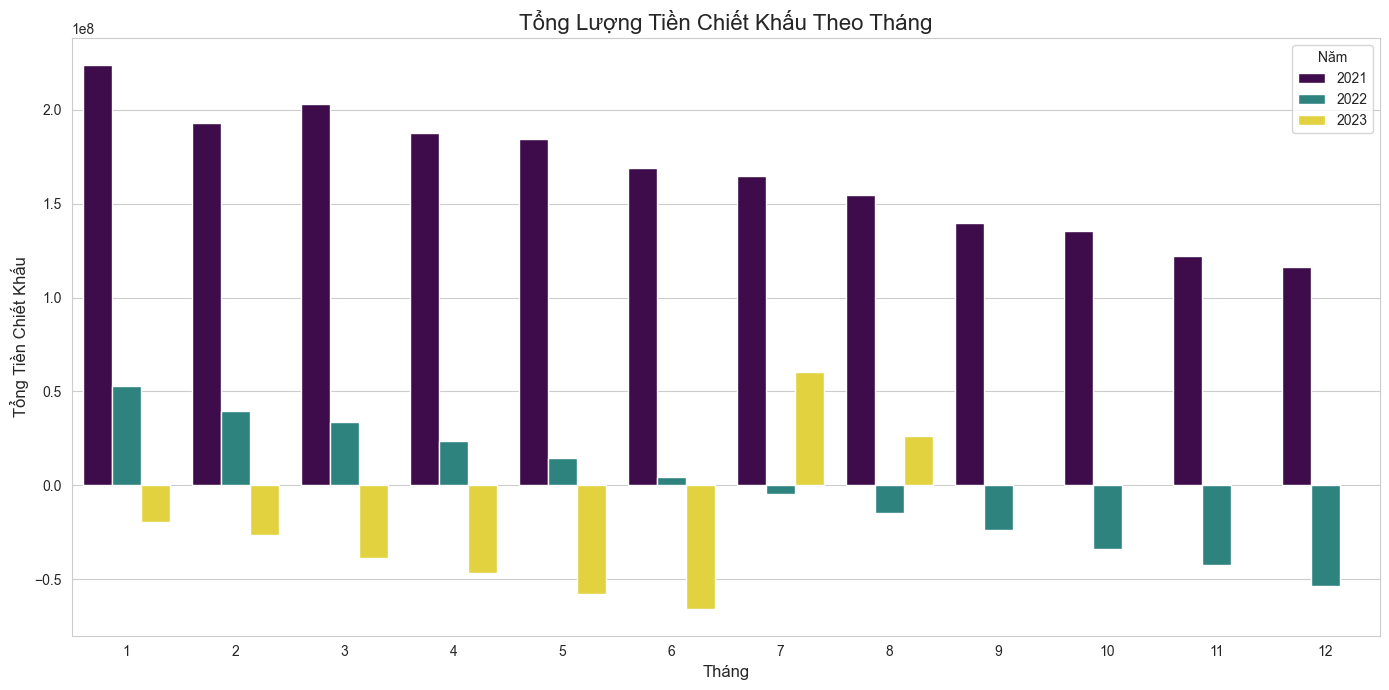

In [ ]:
# trực quan hóa lượng doanh thu mà doanh nghiệp đã chi trả hàng tháng cho chiết khấu
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)

ax = sns.barplot(
    data=monthly_analysis,
    x="order_month",
    y="total_discount",
    hue="order_year",
    palette="viridis"
)

plt.title("Tổng Lượng Tiền Chiết Khấu Theo Tháng", fontsize=16)
plt.xlabel("Tháng", fontsize=12)
plt.ylabel("Tổng Tiền Chiết Khấu", fontsize=12)
plt.xticks(range(0, 12), labels=range(1, 13))
plt.legend(title="Năm")
plt.tight_layout()
plt.show()

## **1.3. Ngành hàng đang dùng nhiều chiết khấu nhất**

In [39]:
# doanh thu và chiết khấu theo ngành hàng (Category1)
category_analysis = (
    df.group_by("category1")
    .agg([
        pl.sum("gross_revenue").alias("total_gross_revenue"),
        pl.sum("net_revenue").alias("total_net_revenue"),
        pl.sum("discount_amount").alias("total_discount")
    ])
    .with_columns(
        # tính tỷ lệ chiết khấu tổng thể của mỗi ngành hàng
        pl.when(pl.col("total_gross_revenue") > 0)
          .then(((pl.col("total_discount") / pl.col("total_gross_revenue")) * 100))
          .otherwise(0)
          .alias("overall_discount_rate")
    )
    .sort("total_discount", descending=True)
    .to_pandas()
)

print("Top 10 ngành hàng 'đốt' nhiều tiền chiết khấu nhất:")
print(category_analysis.head(10))

Top 10 ngành hàng 'đốt' nhiều tiền chiết khấu nhất:
     category1  total_gross_revenue  total_net_revenue  total_discount  \
0      OYUNCAK         3.370647e+09       2.916367e+09    4.542800e+08   
1           EV         3.831525e+09       3.390863e+09    4.406621e+08   
2     KOZMETIK         2.221470e+09       1.954393e+09    2.670770e+08   
3         GIDA         1.015754e+09       8.980706e+08    1.176831e+08   
4        BEBEK         7.615051e+08       6.640686e+08    9.743656e+07   
5     DETERJAN         7.447389e+08       6.524714e+08    9.226747e+07   
6  KAHVALTILIK         7.220882e+08       6.332542e+08    8.883395e+07   
7    SEKERLEME         5.523067e+08       4.855988e+08    6.670792e+07   
8     TEMIZLIK         5.202909e+08       4.591633e+08    6.112759e+07   
9     ET-TAVUK         2.858773e+08       2.508350e+08    3.504225e+07   

   overall_discount_rate  
0              13.477532  
1              11.500959  
2              12.022539  
3              11.585795 

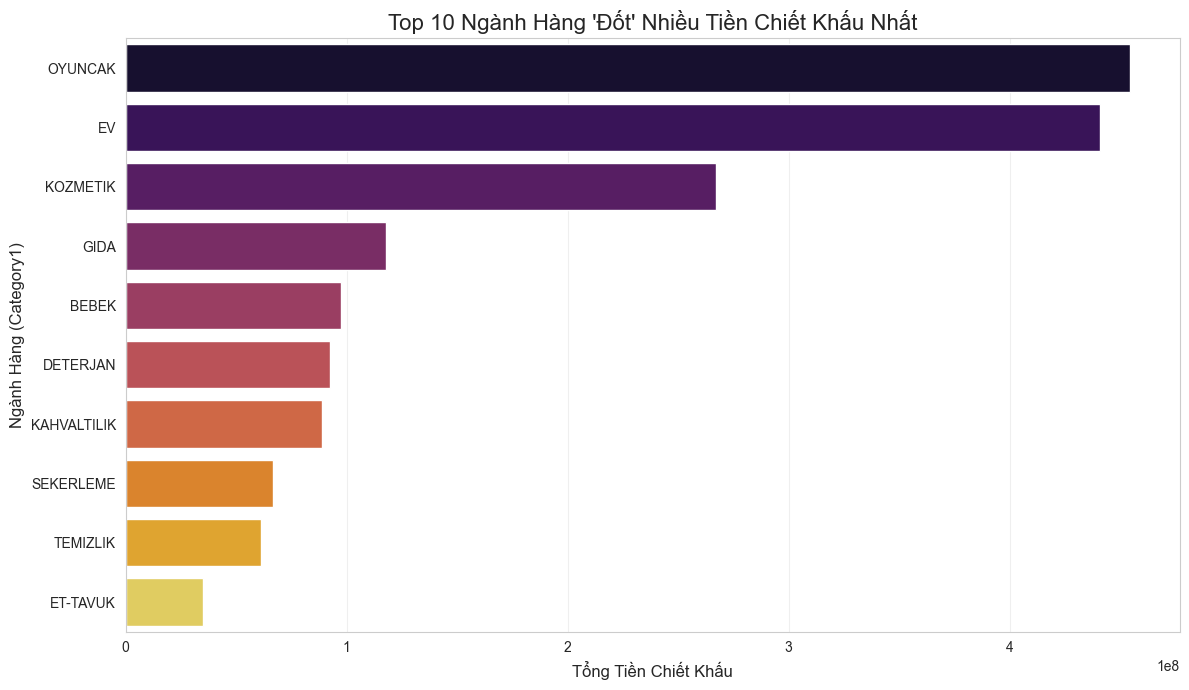

In [40]:
top_10_discount_categories = category_analysis.head(10)

plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_10_discount_categories,
    x="total_discount",
    y="category1",
    palette="inferno"
)

plt.title("Top 10 Ngành Hàng 'Đốt' Nhiều Tiền Chiết Khấu Nhất", fontsize=16)
plt.xlabel("Tổng Tiền Chiết Khấu", fontsize=12)
plt.ylabel("Ngành Hàng (Category1)", fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## **1.4. Doanh thu theo thời gian**

In [41]:
# doanh thu theo ngày 
daily_revenue = (
    df.group_by(pl.col("order_date").dt.date().alias("order_day"))
      .agg(pl.col("net_revenue").sum().alias("daily_revenue"))
      .sort("order_day")
      .to_pandas()
)

# doanh thu theo tháng
monthly_revenue = (
    df.group_by(["order_year", "order_month"])
      .agg(pl.col("net_revenue").sum().alias("monthly_revenue"))
      .sort(["order_year", "order_month"])
      .to_pandas()
)

# doanh thu theo năm
yearly_revenue = (
    df.group_by("order_year")
      .agg(pl.col("net_revenue").sum().alias("yearly_revenue"))
      .sort("order_year")
      .to_pandas()
)

print("Doanh thu hàng năm")
print(yearly_revenue)
print("\nDoanh thu thuần hàng tháng")
print(monthly_revenue.head())

Doanh thu hàng năm
   order_year  yearly_revenue
0        2021    3.708692e+09
1        2022    5.701542e+09
2        2023    3.695403e+09

Doanh thu thuần hàng tháng
   order_year  order_month  monthly_revenue
0        2021            1     2.623747e+08
1        2021            2     2.453482e+08
2        2021            3     2.805477e+08
3        2021            4     2.811996e+08
4        2021            5     3.007107e+08


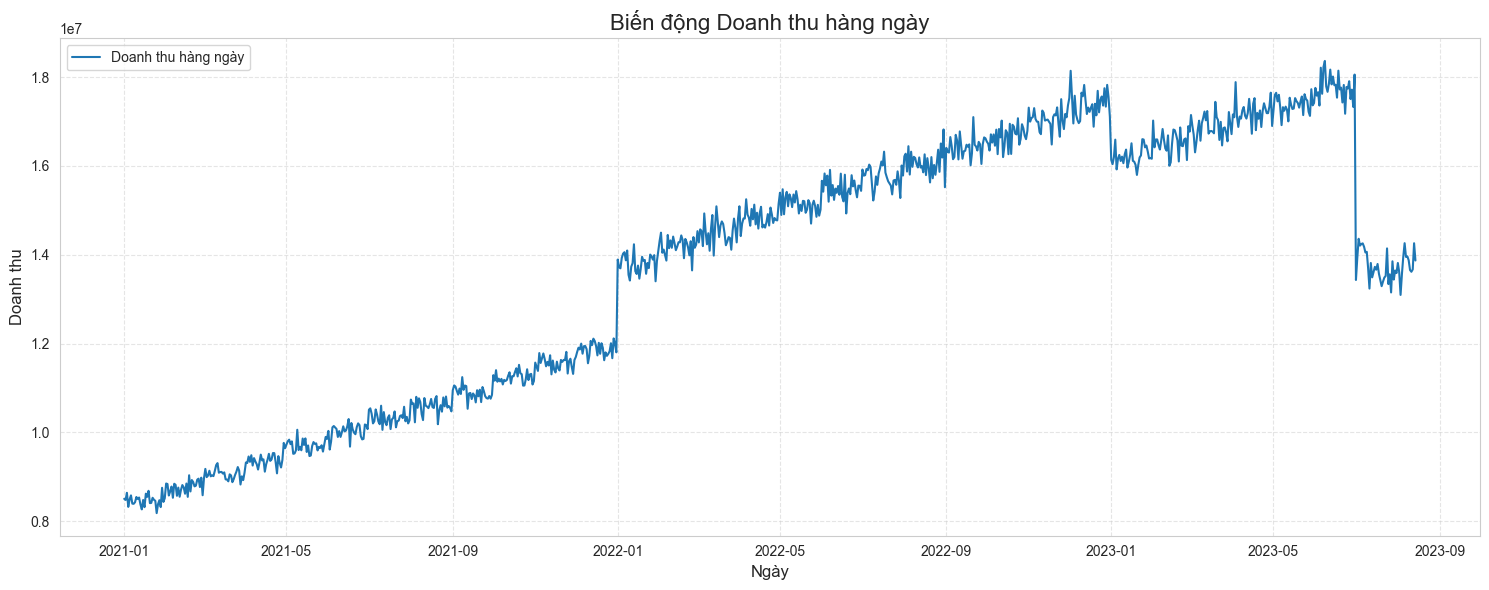

In [42]:
sns.set_style("whitegrid")

plt.figure(figsize=(15, 6))
plt.plot(daily_revenue["order_day"], daily_revenue["daily_revenue"], label="Doanh thu hàng ngày")
plt.title("Biến động Doanh thu hàng ngày", fontsize=16)
plt.xlabel("Ngày", fontsize=12)
plt.ylabel("Doanh thu", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

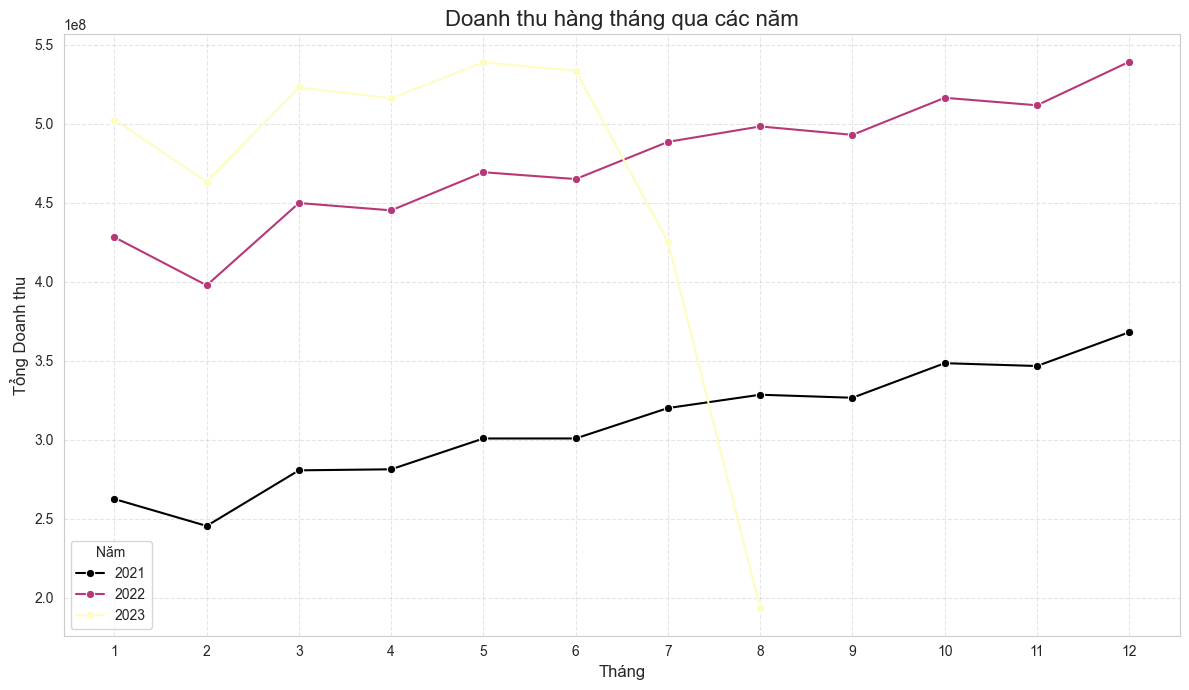

In [43]:
plt.figure(figsize=(12, 7))
sns.lineplot(
    data=monthly_revenue,
    x="order_month",
    y="monthly_revenue",
    hue="order_year",
    marker="o",
    palette="magma"
)
plt.title("Doanh thu hàng tháng qua các năm", fontsize=16)
plt.xlabel("Tháng", fontsize=12)
plt.ylabel("Tổng Doanh thu", fontsize=12)
plt.xticks(range(1, 13))
plt.legend(title="Năm")
plt.grid(True, alpha=0.5, linestyle='--')
plt.tight_layout()
plt.show()

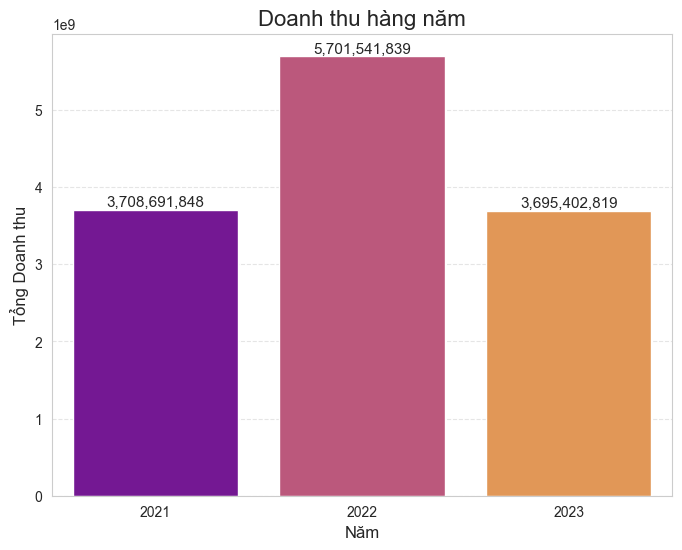

In [44]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=yearly_revenue,
    x="order_year",
    y="yearly_revenue",
    palette="plasma"
)
plt.title("Doanh thu hàng năm", fontsize=16)
plt.xlabel("Năm", fontsize=12)
plt.ylabel("Tổng Doanh thu", fontsize=12)
plt.grid(axis='y', alpha=0.5, linestyle='--')

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, 
            bar.get_height(), 
            f'{bar.get_height():,.0f}', 
            ha='center', va='bottom', fontsize=11)

plt.show()

## **1.5. Doanh thu theo khu vực**

In [45]:
# doanh thu theo vùng
region_revenue = (
    df.group_by("branch_region")
      .agg(pl.col("net_revenue").sum().alias("region_revenue"))
      .sort("region_revenue", descending=True)
      .to_pandas()
)

print("Doanh thu theo Vùng")
print(region_revenue)

Doanh thu theo Vùng
       branch_region  region_revenue
0            Marmara    3.815074e+09
1         İç Anadolu    2.091936e+09
2                Ege    1.893638e+09
3            Akdeniz    1.670290e+09
4  Güneydoğu Anadolu    1.424158e+09
5          Karadeniz    1.244741e+09
6       Doğu Anadolu    9.658008e+08


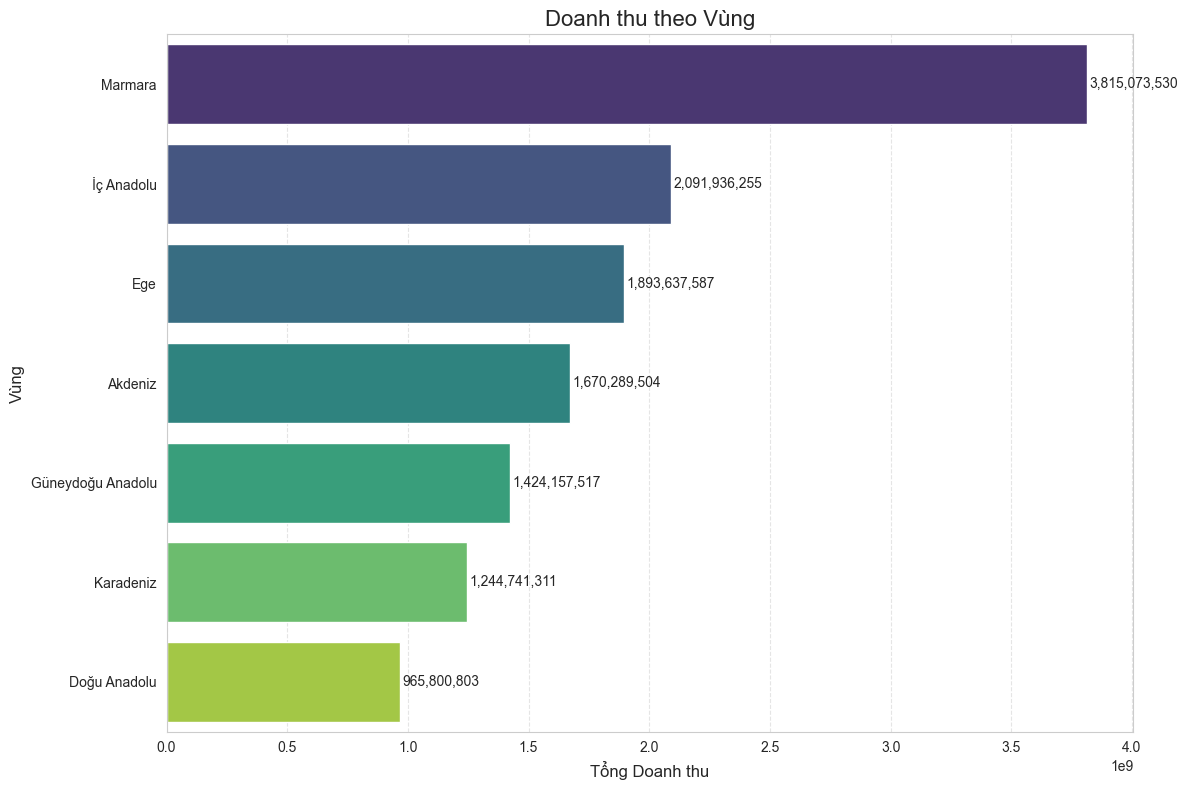

In [ ]:
# trực quan thống kê doanh thu
sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=region_revenue,
    x="region_revenue",
    y="branch_region",
    palette="viridis"
)

plt.title("Doanh thu theo Vùng", fontsize=16)
plt.xlabel("Tổng Doanh thu", fontsize=12)
plt.ylabel("Vùng", fontsize=12)
plt.grid(axis='x', alpha=0.5, linestyle='--')

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1e7,  
             p.get_y() + p.get_height() / 2,
             f'{width:,.0f}',
             va='center')

plt.tight_layout()
plt.show()

## **1.6. Ngành hàng mang lại doanh thu cao nhất**

In [47]:
category_revenue = (
    df.group_by("category1")
      .agg(pl.col("net_revenue").sum().alias("category_revenue"))
      .sort("category_revenue", descending=True)
      .to_pandas()
)

print("Top 10 Ngành hàng có Doanh thu cao nhất")
print(category_revenue.head(15))

Top 10 Ngành hàng có Doanh thu cao nhất
          category1  category_revenue
0                EV      3.390863e+09
1           OYUNCAK      2.916367e+09
2          KOZMETIK      1.954393e+09
3              GIDA      8.980706e+08
4             BEBEK      6.640686e+08
5          DETERJAN      6.524714e+08
6       KAHVALTILIK      6.332542e+08
7         SEKERLEME      4.855988e+08
8          TEMIZLIK      4.591633e+08
9          ET-TAVUK      2.508350e+08
10              SUT      2.249195e+08
11            KAGIT      1.442534e+08
12  CAY-KAHVE-SEKER      1.404504e+08
13  SOGUK ICECEKLER      7.796601e+07
14        SIGARALAR      4.923853e+07


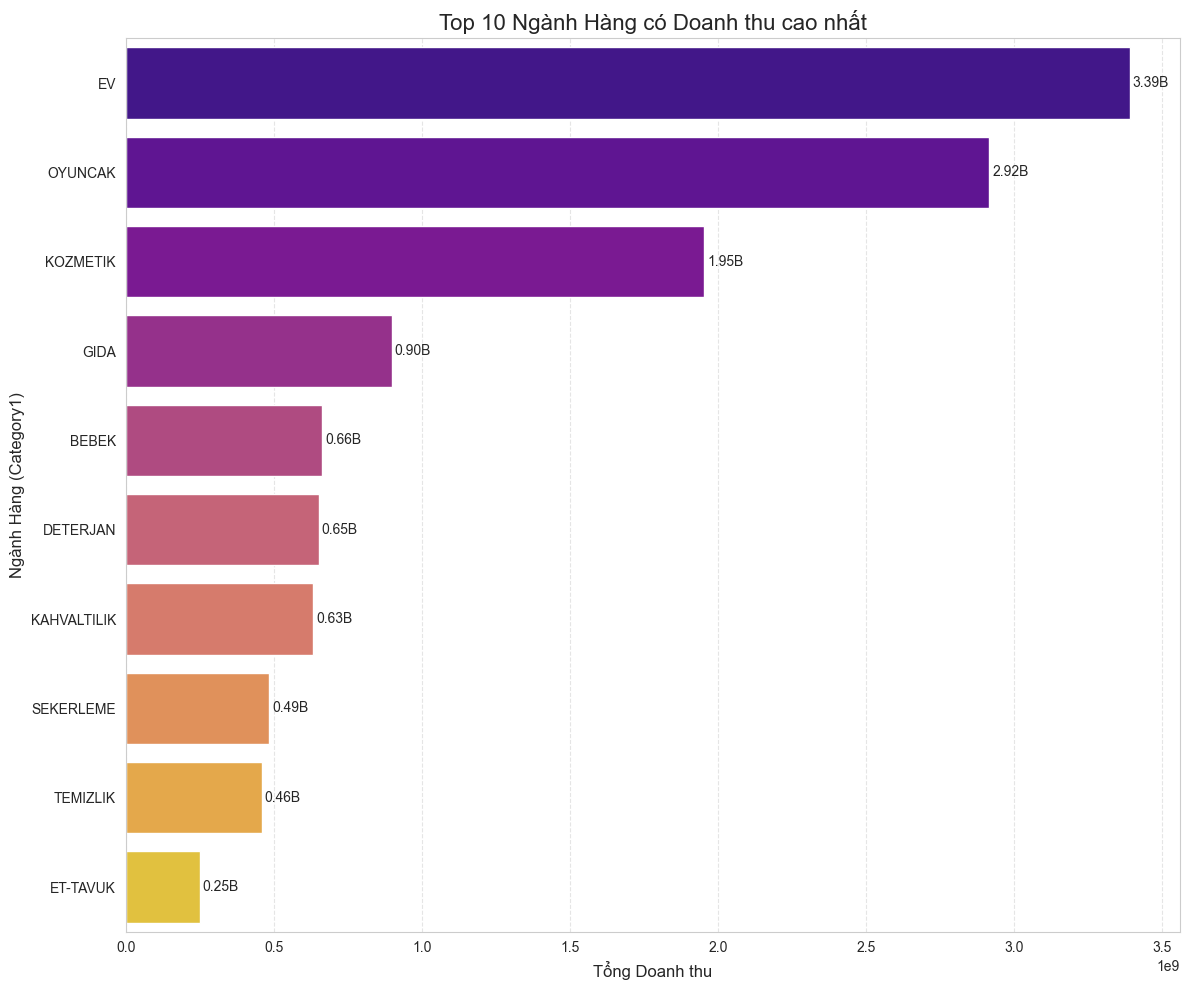

In [48]:
top_10_categories = category_revenue.head(10)

plt.figure(figsize=(12, 10))
ax = sns.barplot(
    data=top_10_categories,
    x="category_revenue",
    y="category1",
    palette="plasma"
)

plt.title("Top 10 Ngành Hàng có Doanh thu cao nhất", fontsize=16)
plt.xlabel("Tổng Doanh thu", fontsize=12)
plt.ylabel("Ngành Hàng (Category1)", fontsize=12)
plt.grid(axis='x', alpha=0.5, linestyle='--')

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1e7, 
             p.get_y() + p.get_height() / 2,
             f'{(width / 1e9):.2f}B',
             va='center')

plt.tight_layout()
plt.show()

## **1.7. Dự đoán doanh thu sử dụng mô hình Linear Regression**

## **1.8. Dự đoán doanh thu trong 6 tháng tới**

# **2. Phân tích giỏ hàng**

## **2.2. Combo sản phẩm**

In [51]:
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
from collections import Counter

In [78]:
# gom nhóm theo order_id và list sản phẩm 
transaction_data = (
    df
    .select(["order_id", "category4"])  
    .group_by("order_id")
    .agg(pl.col("category4").alias("items"))
)

In [79]:
transactions = transaction_data["items"].to_list()

# chỉ giữ lại những đơn hàng có trên 1 sản phẩm (đơn có 1 sản phẩm - không tạo được luật)
# vd: chỉ giữ những đơn trên 1 sản phẩm: {bánh mì, sữa, bơ} | loại bỏ các đơn 1 sản phẩm {bánh mì} hoặc {sữa}
transactions = [t for t in transactions if len(t) > 1]

print(f"Số giao dịch sau khi lọc: {len(transactions)}")

Số giao dịch sau khi lọc: 9098651


In [80]:
np.random.seed(42)
SAMPLE_SIZE = 500_000 # 500k mẫu giao dịch
TOP_N_ITEMS = 500

actual_sample_size = min(SAMPLE_SIZE, len(transactions))
if actual_sample_size < SAMPLE_SIZE:
    print(f"Số lượng giao dịch không đủ dữ liệu. Lấy mẫu tối đa: {actual_sample_size:,}")

sample_idx = np.random.choice(len(transactions), size=actual_sample_size, replace=False)
transactions_sample_raw = [transactions[i] for i in sample_idx]

print(f"Số giao dịch mẫu đã lấy: {len(transactions_sample_raw):,}")

Số giao dịch mẫu đã lấy: 500,000


In [81]:
# lọc top 500 sản phẩm phổ biến nhất từ tập 500k mẫu
all_items = [item for t in transactions_sample_raw for item in t]
item_counts = Counter(all_items)
top_items = set([item for item, count in item_counts.most_common(TOP_N_ITEMS)])

In [82]:
# lọc lại các sản phẩm chỉ chứa các item phổ biến
filtered_transactions = [
    [item for item in t if item in top_items]
    for t in transactions_sample_raw
]

filtered_transactions = [t for t in filtered_transactions if len(t) > 1] # loại bỏ những giao dịch chỉ còn 0 hoặc 1 item sau khi lọc

print(f"Số giao dịch cuối cùng: {len(filtered_transactions):,}")
print(f"Số lượng item duy nhất tham gia phân tích: {len(top_items)}")

Số giao dịch cuối cùng: 498,447
Số lượng item duy nhất tham gia phân tích: 500


In [83]:
# mã hóa dữ liệu 
te = TransactionEncoder()
te_ary = te.fit(filtered_transactions).transform(filtered_transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

In [89]:
# dùng thuật toán FP-Growth sinh luật kết hợp
MIN_SUPPORT = 0.002
frequent_itemsets = fpgrowth(df_trans, min_support=MIN_SUPPORT, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values("support", ascending=False)
print(f"Có {len(frequent_itemsets)} tập phổ biến")

MemoryError: Unable to allocate 1.86 GiB for an array with shape (498447, 500) and data type float64

In [ ]:
MIN_THRESHOLD = 1.0
rules_1m = association_rules(frequent_itemsets, metric="lift", min_threshold=MIN_THRESHOLD)
rules_1m = rules_1m.sort_values(["confidence", "lift"], ascending=[False, False])
print(f"Tìm thấy {len(rules_1m)} luật kết hợp")

print("\nTop 10 luật kết hợp mạnh nhất:")
display(rules_1m.head(10))

Tìm thấy 302 luật kết hợp

Top 10 luật kết hợp mạnh nhất:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
132,(GOFRET),(KIRTASIYE),0.040722,0.461576,0.019106,0.469181,1.016477,1.0,0.000310,1.014327,0.016898,0.039541,0.014125,0.255287
297,(KREMLER),(KIRTASIYE),0.021774,0.461576,0.010176,0.467346,1.012501,1.0,0.000126,1.010833,0.012622,0.021506,0.010717,0.244696
122,(SIVI-JEL SABUNLAR),(KIRTASIYE),0.041470,0.461576,0.019342,0.466409,1.010472,1.0,0.000200,1.009058,0.010811,0.039987,0.008977,0.254157
298,(VUCUT SAMPUANLARI),(KIRTASIYE),0.021804,0.461576,0.010162,0.466061,1.009717,1.0,0.000098,1.008400,0.009838,0.021474,0.008330,0.244039
193,"(OYUNCAKLAR, CORAPLAR)",(KIRTASIYE),0.029740,0.461576,0.013852,0.465770,1.009086,1.0,0.000125,1.007851,0.009280,0.029012,0.007789,0.247890
182,"(BISKUVI, MUTFAK ESYA-GERECLERI)",(KIRTASIYE),0.030402,0.461576,0.014152,0.465496,1.008492,1.0,0.000119,1.007333,0.008684,0.029617,0.007280,0.248078
165,(BULASIK MAKINASI URUNLERI),(KIRTASIYE),0.034640,0.461576,0.016124,0.465473,1.008444,1.0,0.000135,1.007291,0.008674,0.033585,0.007239,0.250203
290,"(OYUNCAKLAR, PEYNIRLER)",(KIRTASIYE),0.022370,0.461576,0.010412,0.465445,1.008382,1.0,0.000087,1.007237,0.008502,0.021988,0.007185,0.244001
99,"(KITAP, SAMPUANLAR)",(KIRTASIYE),0.045650,0.461576,0.021236,0.465192,1.007833,1.0,0.000165,1.006761,0.008144,0.043696,0.006715,0.255600
44,"(OYUNCAKLAR, MUTFAK ESYA-GERECLERI)",(KIRTASIYE),0.086138,0.461576,0.040034,0.464766,1.006911,1.0,0.000275,1.005960,0.007510,0.078857,0.005924,0.275750


In [ ]:
top10_itemsets = frequent_itemsets.sort_values("support", ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(
    [' + '.join(list(i)) for i in top10_itemsets['itemsets']],
    top10_itemsets['support'] * 100
)
plt.gca().invert_yaxis()
plt.title("Top 10 tập phổ biến (mẫu 1 triệu đơn, top 500 items)", fontsize=14)
plt.xlabel("Support (%)")
plt.ylabel("Itemsets")

for bar in bars:
    plt.text(
        bar.get_width() + 0.3,
        bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.2f}%",
        va='center'
    )

plt.tight_layout()
plt.show()

# **5 Hệ thống gợi ý**

In [7]:
# hệ thống gợi ý
# rule-based - dựa trên tần suất xuất hiện != item-based - dựa trên mức độ tương đồng sản phẩm
# quy tắc nếu A => thì B
# chi cần dữ liệu bán hàng, không cần ma trận user-item
# nhanh nhưng chưa cá nhân hóa
def recommend_for_cart(cart_items, rules, pop_ctx, k=8):
    candidates = {}
    for a in cart_items:
        for _, row in rules[rules['antecedents'].apply(lambda s: a in s)].iterrows():
            for b in row['consequents']:
                if b in cart_items: 
                    continue
                score = 0.5*row['lift'] + 0.4*row['confidence'] + 0.1*row['support']
                candidates[b] = max(candidates.get(b, 0), score)
    for b, p in pop_ctx.items():
        candidates.setdefault(b, 0.05*p)
    return sorted(candidates.items(), key=lambda x: x[1], reverse=True)[:k]

In [8]:
# danh sách sản phẩm khách đang mua
cart_items = ["KITAPLAR", "KIRTASIYE GERECLERI"]

# pop_ctx: độ phổ biến sản phẩm
pop_ctx = dict(zip(itemsets["itemsets"].astype(str), itemsets["support"]))

# gợi ý 3 sản phẩm
RECOMMEND_ITEMS = 3
recommendations = recommend_for_cart(cart_items, rules, pop_ctx, k=RECOMMEND_ITEMS)

for product, score in recommendations:
    match = rules[rules["consequents"].apply(lambda s: product in s)]
    if not match.empty:
        lift = match["lift"].iloc[0]
        conf = match["confidence"].iloc[0]
        supp = match["support"].iloc[0]
        print(f"{product:30s} | Lift: {lift:.3f} | Conf: {conf:.3f} | Supp: {supp:.3f} | Score: {score:.3f}")
    else:
        print(f"{product:30s} | (Không có luật trực tiếp, score = {score:.3f})")

NameError: name 'itemsets' is not defined